In [ ]:
import mysql.connector
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [ ]:
import pyodbc

conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=127.0.0.1,1433;'
    'DATABASE=your_database_name;'
    'UID=your_username;'
    'PWD=your_password'
)

print("Connected!")


In [ ]:
query="SELECT * FROM banking_case.customercsv"

In [ ]:
df=pd.read_sql(query,cnx)

In [ ]:
cnx.close()

In [ ]:
df.head()

In [ ]:
df.describe()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 3000 entries, 0 to 2999
,Data columns (total 25 columns):
, #   Column                    Non-Null Count  Dtype  
,---  ------                    --------------  -----  
, 0   Client ID                 3000 non-null   object 
, 1   Name                      3000 non-null   object 
, 2   Age                       3000 non-null   int64  
, 3   Location ID               3000 non-null   int64  
, 4   Joined Bank               3000 non-null   object 
, 5   Banking Contact           3000 non-null   object 
, 6   Nationality               3000 non-null   object 
, 7   Occupation                3000 non-null   object 
, 8   Fee Structure             3000 non-null   object 
, 9   Loyalty Classification    3000 non-null   object 
, 10  Estimated Income          3000 non-null   float64
, 11  Superannuation Savings    3000 non-null   float64
, 12  Amount of Credit Cards    3000 non-null   int64  
, 13  Credit Card Balance       3000 non-null   flo

In [29]:
df.shape

(3000, 25)

<Axes: xlabel='Income Band'>

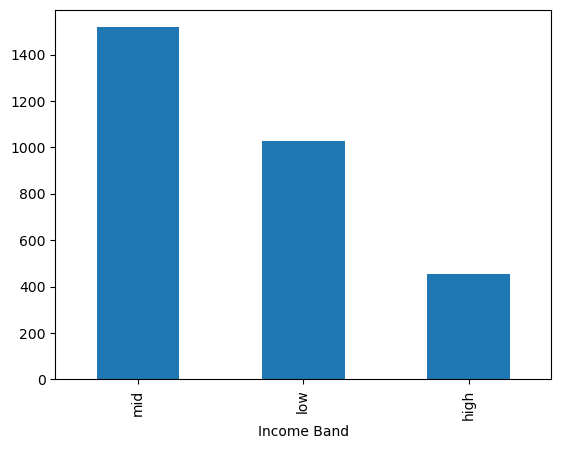

In [37]:
#Estimated Income
bins=[0,100000,300000,float('inf')]
labes=['low','mid','high']
df['Income Band']=pd.cut(df['Estimated Income'],bins=bins,labels=labes,right=True)
df['Income Band'].value_counts().plot(kind='bar')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 3000 entries, 0 to 2999
,Data columns (total 26 columns):
, #   Column                    Non-Null Count  Dtype   
,---  ------                    --------------  -----   
, 0   Client ID                 3000 non-null   object  
, 1   Name                      3000 non-null   object  
, 2   Age                       3000 non-null   int64   
, 3   Location ID               3000 non-null   int64   
, 4   Joined Bank               3000 non-null   object  
, 5   Banking Contact           3000 non-null   object  
, 6   Nationality               3000 non-null   object  
, 7   Occupation                3000 non-null   object  
, 8   Fee Structure             3000 non-null   object  
, 9   Loyalty Classification    3000 non-null   object  
, 10  Estimated Income          3000 non-null   float64 
, 11  Superannuation Savings    3000 non-null   float64 
, 12  Amount of Credit Cards    3000 non-null   int64   
, 13  Credit Card Balance       3000

In [43]:
# Examine the unique categories in categorical columns
cat_cols = ['BRId','GenderId','IAId','Amount of Credit Cards','Loyalty Classification',
            'Fee Structure','Occupation','Nationality','Banking Contact','Joined Bank','Location ID']

for col in cat_cols:
    print(f"Value counts for `{col}`:")
    display(df[col].value_counts())

Value counts for `BRId`:


BRId
3    1352
1     660
2     495
4     493
Name: count, dtype: int64

Value counts for `GenderId`:


GenderId
2    1512
1    1488
Name: count, dtype: int64

Value counts for `IAId`:


IAId
1     177
3     177
4     177
8     177
2     177
11    176
15    176
14    176
13    176
12    176
10    176
9     176
7      89
6      89
5      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64

Value counts for `Amount of Credit Cards`:


Amount of Credit Cards
1    1922
2     765
3     313
Name: count, dtype: int64

Value counts for `Loyalty Classification`:


Loyalty Classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64

Value counts for `Fee Structure`:


Fee Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64

Value counts for `Occupation`:


Occupation
Structural Analysis Engineer    28
Associate Professor             28
Recruiter                       25
Human Resources Manager         24
Account Coordinator             24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64

Value counts for `Nationality`:


Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

Value counts for `Banking Contact`:


Banking Contact
Ernest Rivera          77
Anthony Torres         72
Frank Brown            72
Benjamin Kim           72
Dennis Ruiz            71
Patrick Graham         69
Joe Price              68
Nicholas Cunningham    67
Chris Armstrong        67
Jesse Evans            67
Victor Martinez        67
Shawn Cook             66
Anthony Berry          66
James Castillo         65
Douglas Tucker         65
Joshua Bennett         65
Bruce Porter           64
Adam Hernandez         64
Dennis Morris          64
Stephen Payne          63
Jerry Green            63
Nicholas Simmons       63
Paul Holmes            63
Victor Ramos           63
Jeremy Vasquez         62
Shawn Long             62
Raymond Alexander      62
Jonathan Hawkins       61
Joshua Little          60
Mark Montgomery        60
Paul Larson            60
Roger Alexander        59
Joshua Ryan            59
Anthony Simpson        59
Samuel Fowler          58
Shawn Wallace          57
Joe Hanson             57
Bruce Butler          

Value counts for `Joined Bank`:


Joined Bank
03/02/2020    4
19/06/2020    4
17/03/2019    4
17/06/2021    3
18/08/2007    3
             ..
28/01/2011    1
29/10/2020    1
22/07/2020    1
01/12/2011    1
08/12/2005    1
Name: count, Length: 2579, dtype: int64

Value counts for `Location ID`:


Location ID
1031     3
17648    3
30792    2
19815    2
15083    2
        ..
13571    1
34689    1
3360     1
9398     1
38518    1
Name: count, Length: 2890, dtype: int64

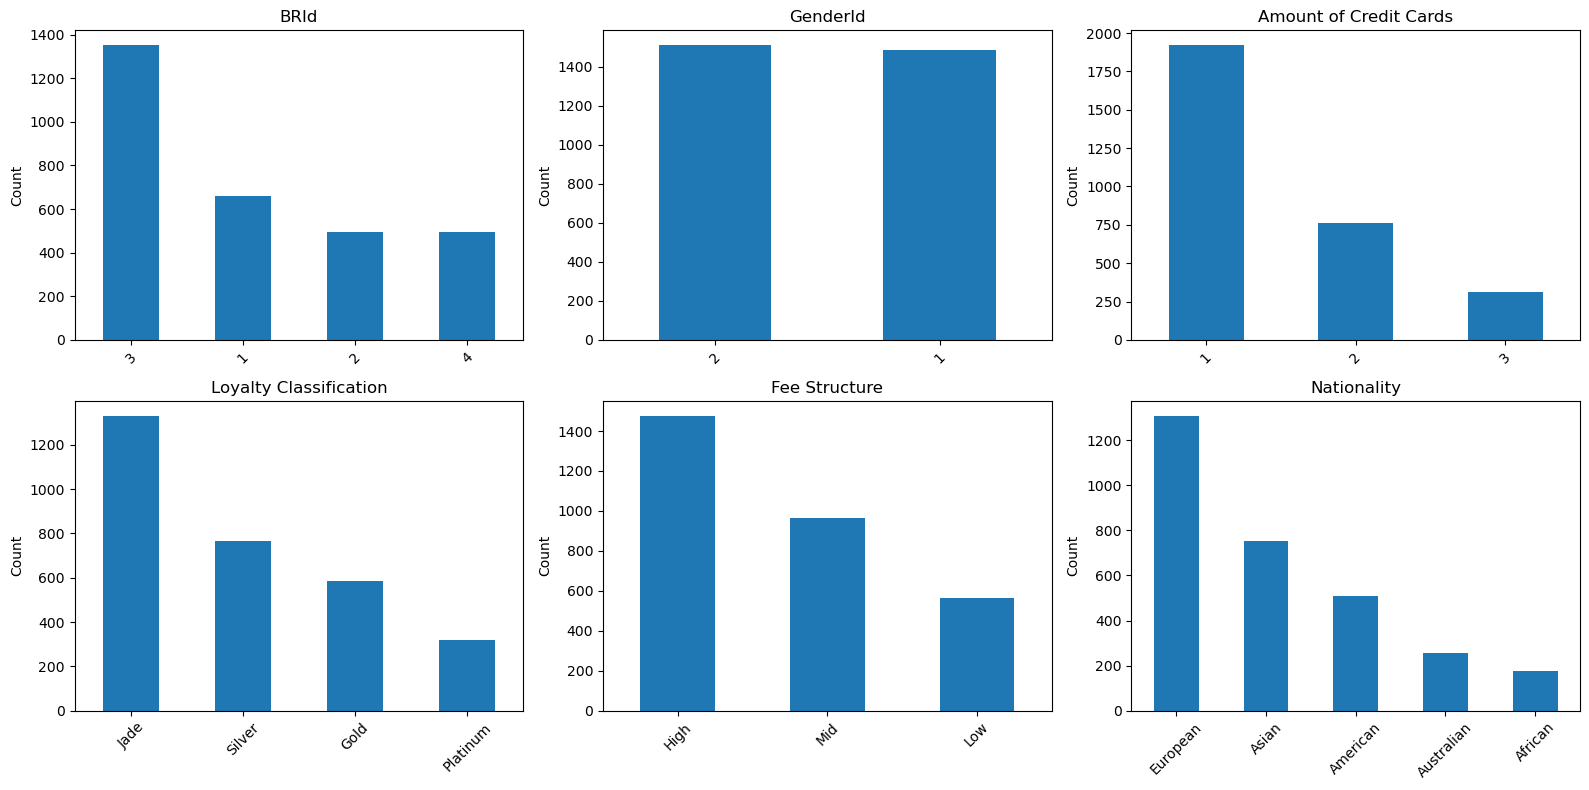

In [49]:
#univariate
cat_cols = ['BRId','GenderId','IAId','Amount of Credit Cards','Loyalty Classification',
            'Fee Structure','Occupation','Nationality','Banking Contact','Joined Bank','Location ID']

# Filter only columns with less than 20 unique values
filtered_cols = [col for col in cat_cols if df[col].nunique() < 20]

# Grid size (adjust rows and cols based on how many plots you want per row)
n_cols = 3
n_rows = (len(filtered_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))

for i, col in enumerate(filtered_cols):
    ax = axes[i // n_cols, i % n_cols]
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f"{col}")
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

# Turn off any unused subplots
for j in range(i+1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

plt.tight_layout()
plt.show()

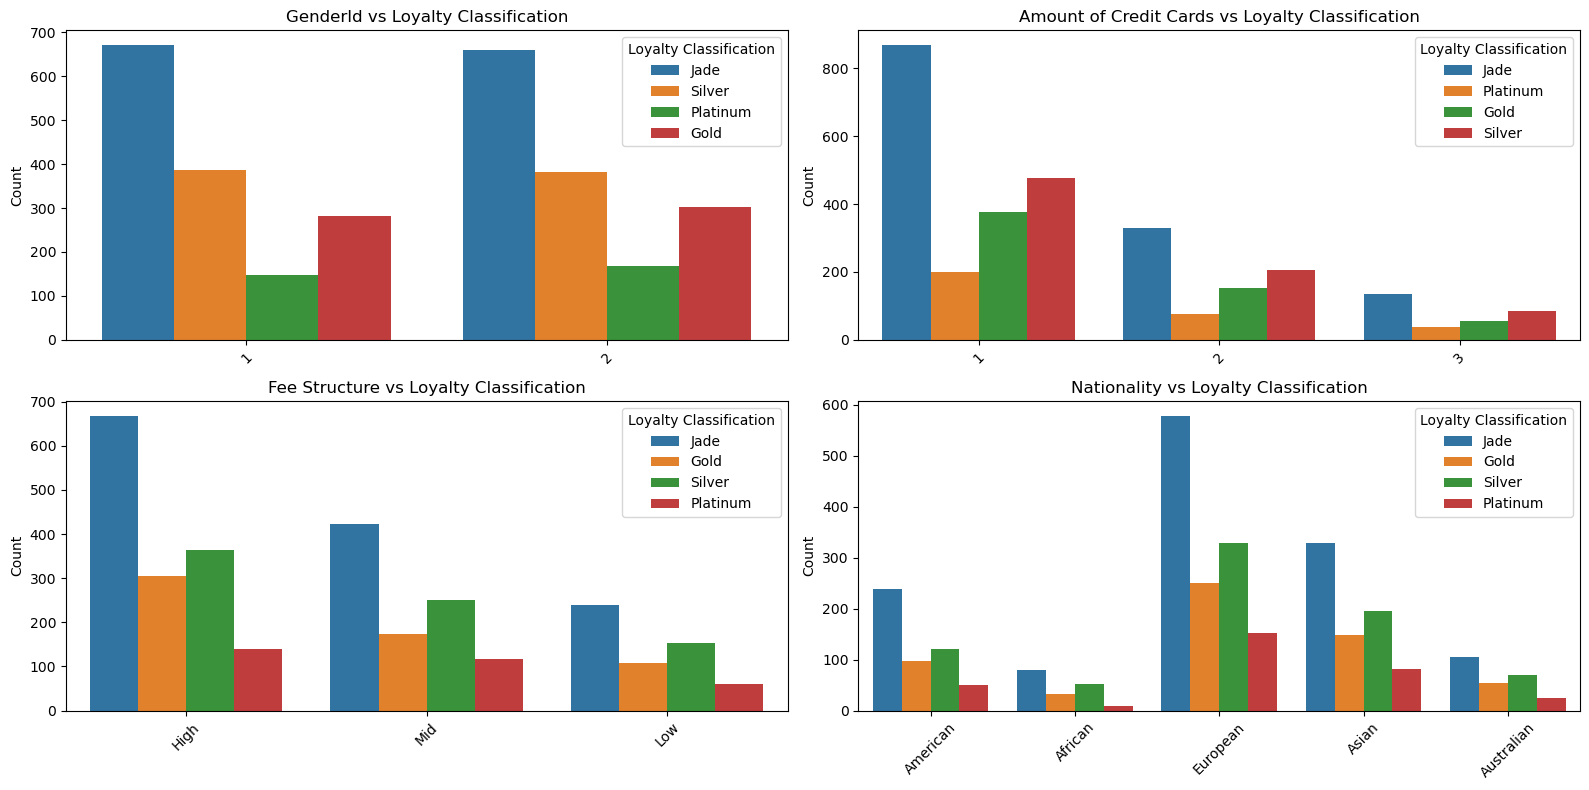

In [55]:
#Bivariate
# List of categorical features to compare with target
cat_cols = ['GenderId','Amount of Credit Cards','Fee Structure',
            'Occupation','Nationality','Banking Contact','Joined Bank']

target_col = 'Loyalty Classification'

# Filter out columns with too many unique values
filtered_cols = [col for col in cat_cols if df[col].nunique() < 20 and col != target_col]

# Grid layout
n_cols = 2
n_rows = (len(filtered_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))

for i, col in enumerate(filtered_cols):
    ax = axes[i // n_cols, i % n_cols]
    sns.countplot(data=df, x=col, hue=target_col, ax=ax)
    ax.set_title(f"{col} vs {target_col}")
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

# Remove any unused empty plots
for j in range(i+1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

plt.tight_layout()
plt.show()

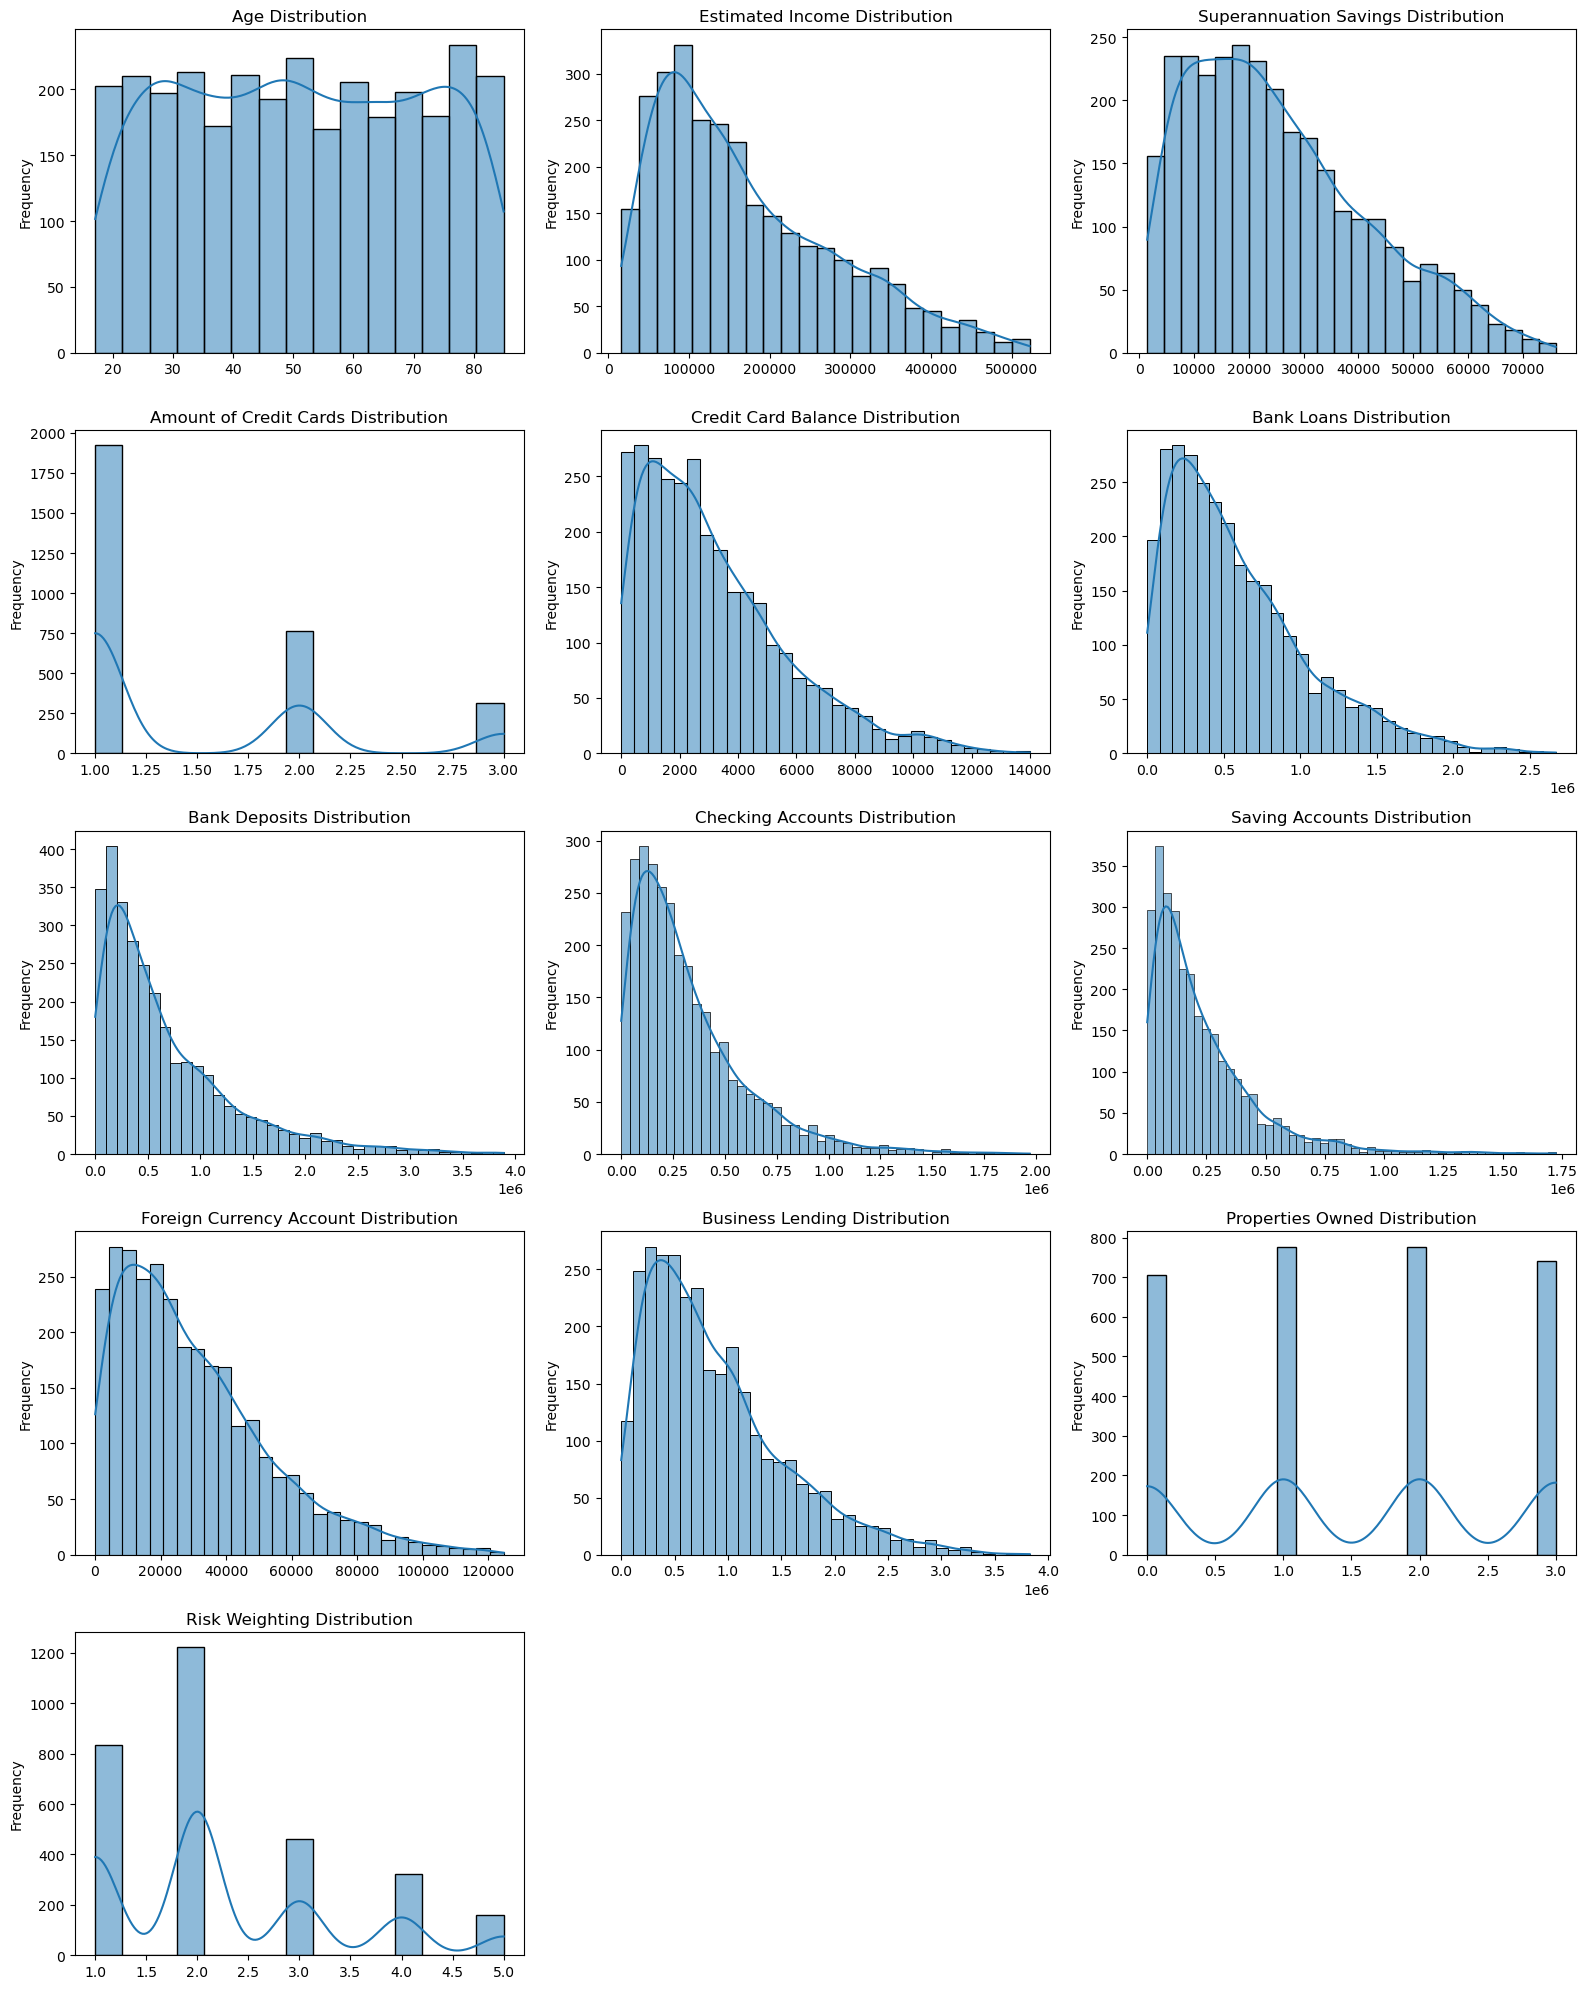

In [67]:
#Numerical Analysis
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Age', 'Estimated Income', 'Superannuation Savings', 'Amount of Credit Cards',
            'Credit Card Balance', 'Bank Loans', 'Bank Deposits', 'Checking Accounts',
            'Saving Accounts', 'Foreign Currency Account', 'Business Lending',
            'Properties Owned', 'Risk Weighting']

# Grid layout
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))

for i, col in enumerate(num_cols):
    ax = axes[i // n_cols, i % n_cols]
    sns.histplot(data=df, x=col, kde=True, ax=ax)
    ax.set_title(f"{col} Distribution")
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

plt.tight_layout()
plt.show()

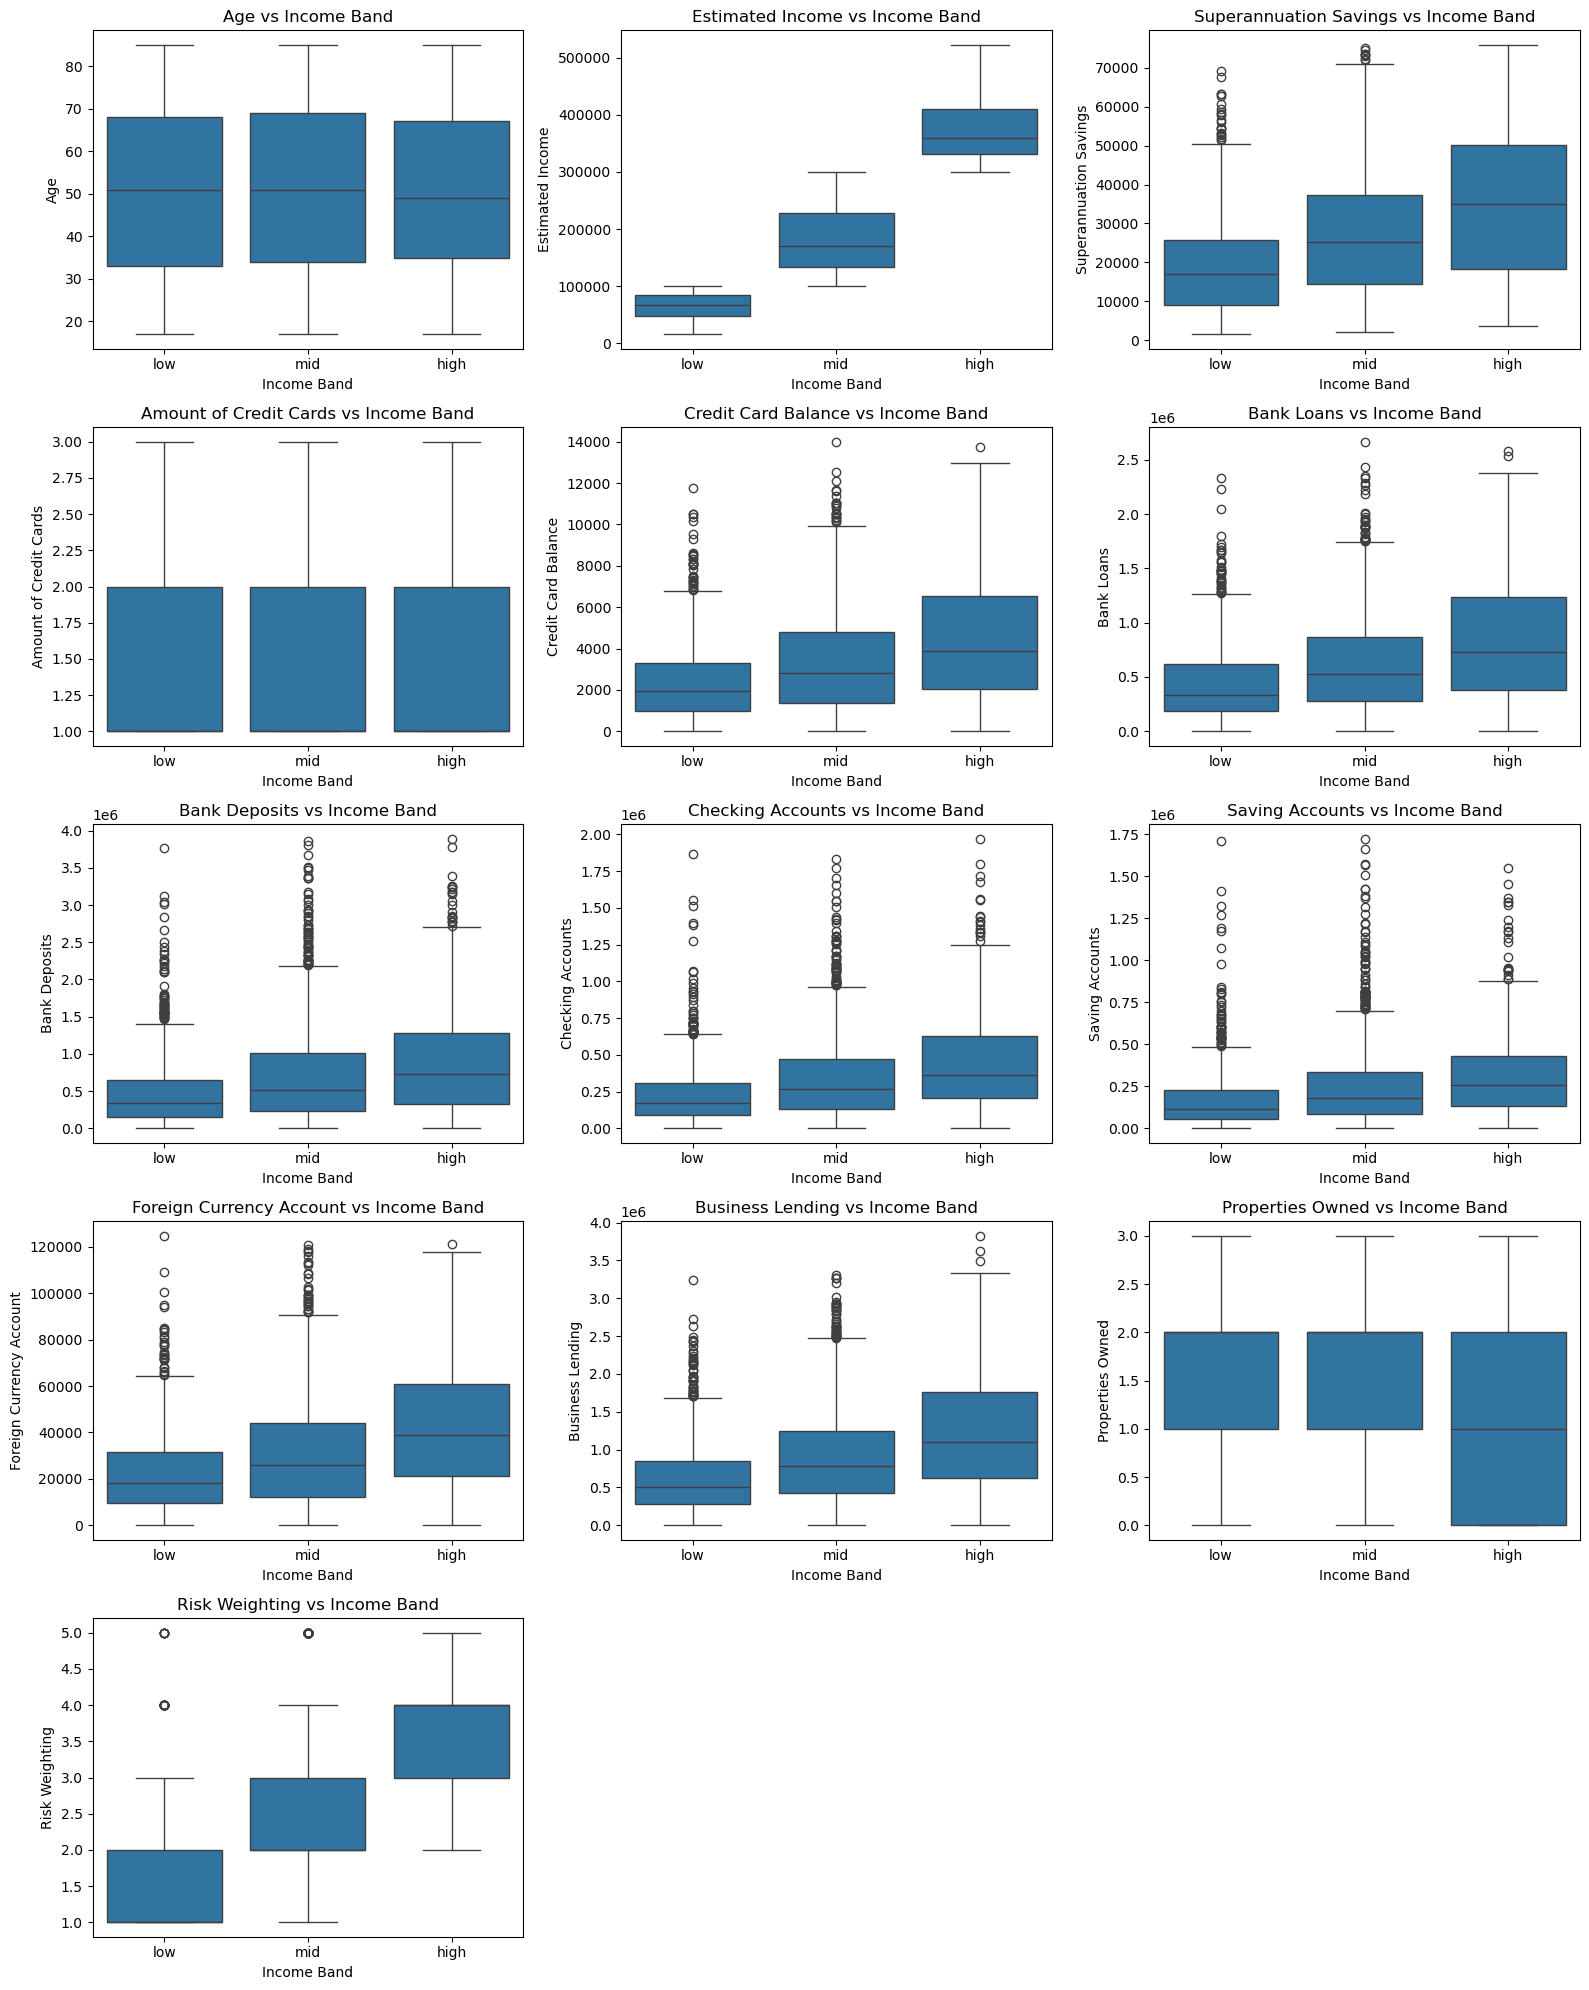

In [69]:
# Grid layout for boxplots
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))

for i, col in enumerate(num_cols):
    ax = axes[i // n_cols, i % n_cols]
    sns.boxplot(data=df, x='Income Band', y=col, ax=ax)
    ax.set_title(f"{col} vs Income Band")
    ax.set_xlabel('Income Band')
    ax.set_ylabel(col)

# Remove extra subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

plt.tight_layout()
plt.show()

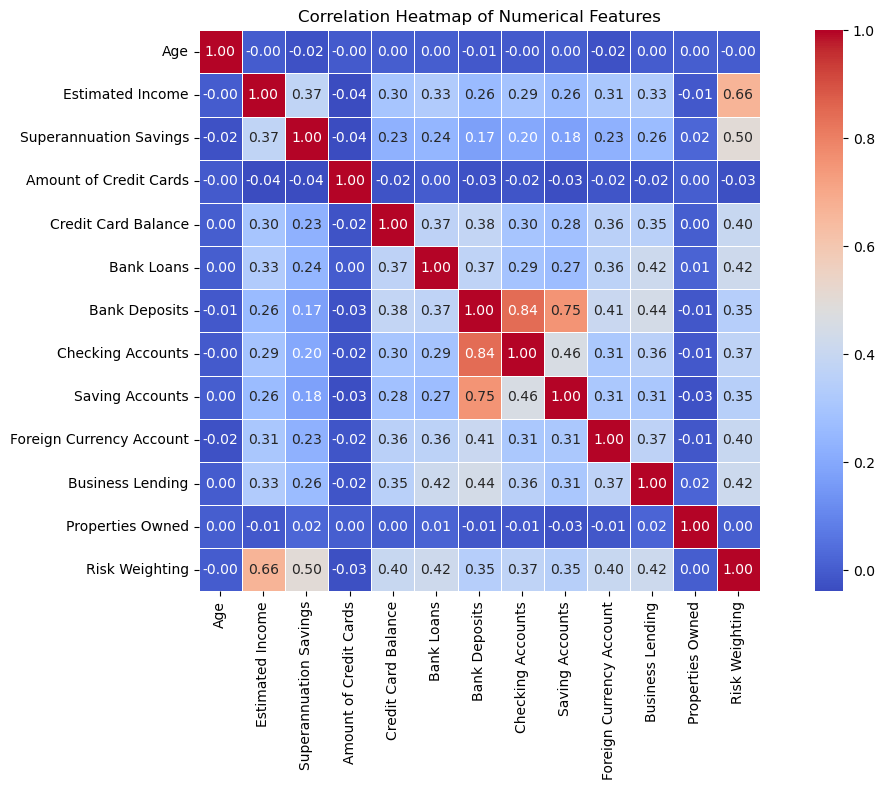

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
num_cols = ['Age', 'Estimated Income', 'Superannuation Savings', 'Amount of Credit Cards',
            'Credit Card Balance', 'Bank Loans', 'Bank Deposits', 'Checking Accounts',
            'Saving Accounts', 'Foreign Currency Account', 'Business Lending',
            'Properties Owned', 'Risk Weighting']

# Compute correlation matrix
corr_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()